In [8]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
with open('db_config.json') as file:
    db_config = json.load(file)

engine = create_engine(f'postgresql+psycopg2://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:5433/{db_config["dbname"]}')

happy = pd.read_sql('SELECT * FROM happy_df', engine)

print(happy.head()) 
    

    economy  social_support  life_expectancy   freedom  government_corruption  \
0  1.416915        1.436338         0.913476  0.505626               0.163761   
1  0.274000        0.757000         0.505000  0.142000               0.078000   
2  0.191000        0.560000         0.495000  0.443000               0.089000   
3  0.786441        1.548969         0.498273  0.658249               0.246528   
4  1.053510        1.248230         0.787230  0.449740               0.084840   

   generosity    year  continent_asia  continent_asia_europe  \
0    0.120573  2017.0             1.0                    0.0   
1    0.275000  2019.0             0.0                    0.0   
2    0.218000  2019.0             0.0                    0.0   
3    0.415984  2017.0             1.0                    0.0   
4    0.114510  2015.0             0.0                    0.0   

   continent_europe  continent_europe_asia  continent_north_america  \
0               0.0                    0.0               

In [7]:
mse = mean_squared_error(happy['happiness_score'], happy['happiness_score_prediction'])
r2 = r2_score(happy['happiness_score'], happy['happiness_score_prediction'])
mae = mean_absolute_error(happy['happiness_score'], happy['happiness_score_prediction'])

# Mostrar los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.16141668549454125
R² Score: 0.8772300615943722
Mean Absolute Error (MAE): 0.3197850626131863


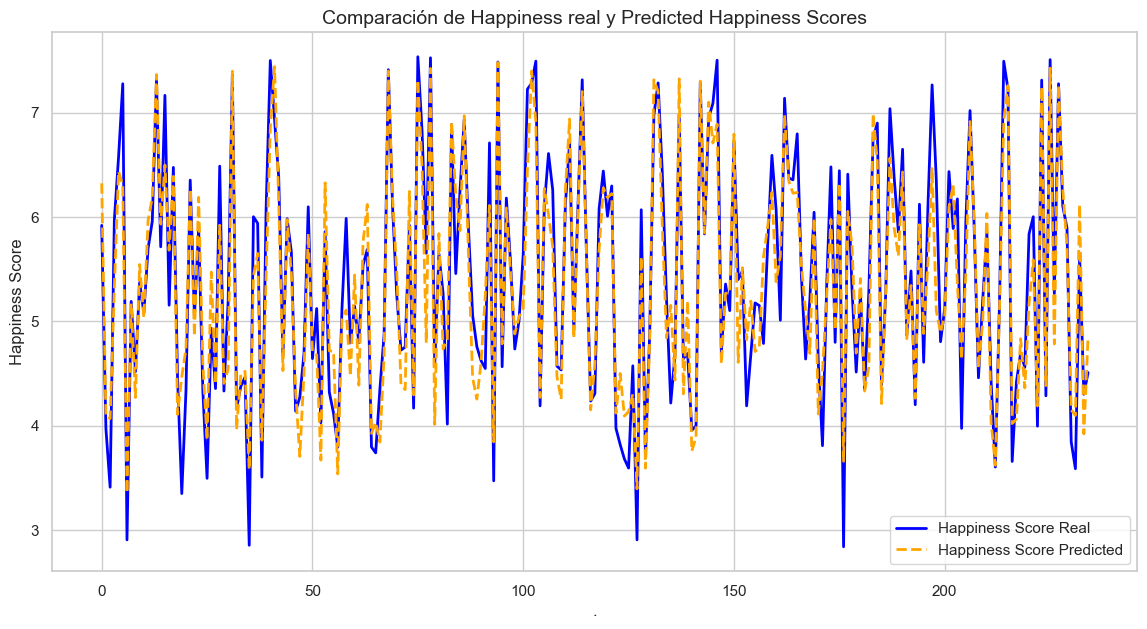

In [12]:
sns.set(style="whitegrid")

# Crear un gráfico de línea para comparar las tendencias de los valores reales y predichos
plt.figure(figsize=(14, 7))

# Graficar los valores reales
plt.plot(happy['happiness_score'], label='Happiness Score Real', color='blue', linewidth=2)

# Graficar los valores predichos
plt.plot(happy['happiness_score_prediction'], label='Happiness Score Predicted', color='orange', linestyle='--', linewidth=2)

# Configurar el título y las etiquetas
plt.title('Comparación de Happiness real y Predicted Happiness Scores', fontsize=14)
plt.xlabel('.', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.show()


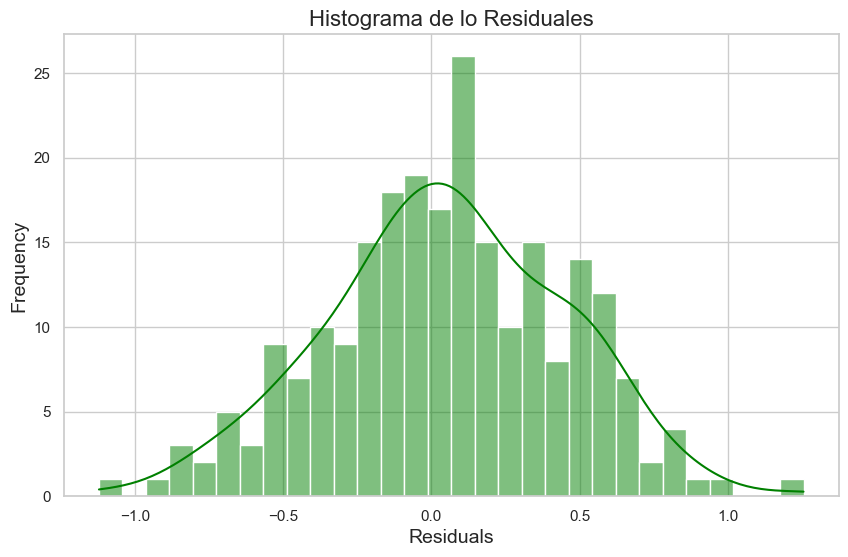

In [15]:
# Crear un histograma de los residuales
plt.figure(figsize=(10, 6))
sns.histplot(happy['residuals'], bins=30, kde=True, color='green')

# Configurar el título y las etiquetas
plt.title('Histograma de lo Residuales', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Mostrar la gráfica
plt.show()
